In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import cartopy.crs as ccrs
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


from utils import *

In [8]:
ds = load_climatology_with_deptho()
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (month: 12, depth: 39, latitude: 121, longitude: 1440)
Coordinates:
  * depth      (depth) float32 156B 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude   (latitude) float32 484B 60.0 60.25 60.5 60.75 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    S          (month, depth, latitude, longitude) float32 326MB 32.93 ... 34.88
    T          (month, depth, latitude, longitude) float32 326MB 2.22 ... 0.6027
    SIC        (month, latitude, longitude) float32 8MB 0.0008339 ... 0.982
    SIT        (month, latitude, longitude) float32 8MB 0.002912 ... 1.954
    U          (month, depth, latitude, longitude) float32 326MB -0.04629 ......
    V          (month, depth, latitude, longitude) float32 326MB 0.06839 ... ...
    SSH        (month, latitude, longitude) float32 8MB -0.08223 ... -0.5848
    deptho     (latitude, longitude) float64 1MB 2.502e+03 2.01e+03 ... nan nan
Attributes:
    history:      Creation 2023-October-31 12:55:11 GMT+0200
    source:       Copernicus Marine Service
    title:        Monthly mean fields for product GLOBAL_MULTIYEAR_PHY_ENS_00...
    references:   http://marine.copernicus.eu
    Conventions:  CF-1.6
    institution:  Mercator Ocean
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    contact:      servicedesk.cmems@mercator-ocean.eu

## Greenland - Norway

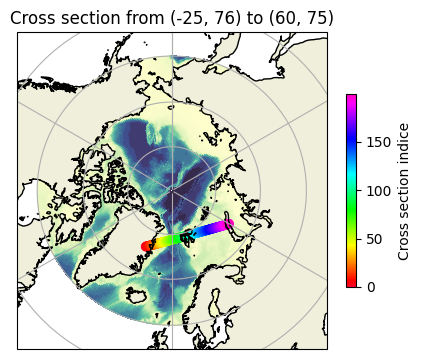

100%|██████████| 200/200 [00:02<00:00, 77.29it/s]


<xarray.Dataset> Size: 3MB
Dimensions:    (cross_section_idx: 200, month: 12, depth: 39, latitude: 200,
                longitude: 200, dist: 200)
Coordinates:
  * depth      (depth) float32 156B 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude   (latitude) float64 2kB 76.0 76.06 76.12 ... 75.13 75.07 75.0
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * longitude  (longitude) float64 2kB -25.0 -24.69 -24.37 ... 59.45 59.73 60.0
  * dist       (dist) float64 2kB 0.0 34.04 68.09 ... 6.741e+03 6.775e+03
Dimensions without coordinates: cross_section_idx
Data variables:
    S          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    T          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    SIC        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    SIT        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    U          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    V          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    SSH        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    deptho     (cross_section_idx) float64 2kB nan nan nan nan ... nan nan nan

In [9]:
lat1, lon1 = (76, -25)
lat2, lon2 = (75, 60)

cs_ds = cross_section(ds, lon1, lat1, lon2, lat2, 200)
cs_ds

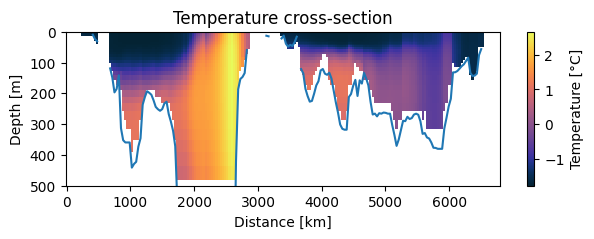

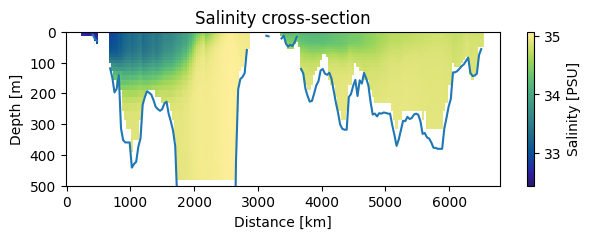

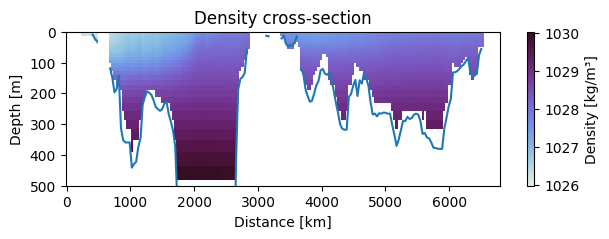

In [10]:
ds_plot = cs_ds.sel(month=4)

fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['T'].values.T, cmap=cmo.thermal)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Temperature [°C]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Temperature cross-section')
plt.show()

# Salinity
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['S'].values.T, cmap=cmo.haline)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Salinity [PSU]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Salinity cross-section')
plt.show()


# Density
ds_plot['rho'] = xr.apply_ufunc(gsw.rho_t_exact, ds_plot['S'], ds_plot['T'], ds_plot.depth, dask='parallelized', output_dtypes=[float])
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['rho'].values.T, cmap=cmo.dense)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Density [kg/m³]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Density cross-section')
plt.show()

In [ ]:
vitesse = vecteurs_coupe(cs_ds)

ds_plot = cs_ds.sel(month=4)

cmap_min = -0.1
cmap_max = +0.1

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['vitesse transversale'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Vitesse transversale')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['V'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Vitesse V')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

## -90° 90 longitude

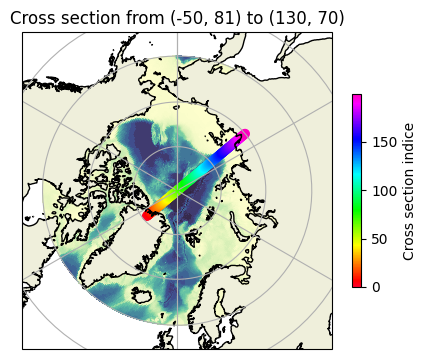

100%|██████████| 200/200 [00:02<00:00, 74.05it/s]


<xarray.Dataset> Size: 3MB
Dimensions:    (cross_section_idx: 200, month: 12, depth: 39, latitude: 200,
                longitude: 200, dist: 200)
Coordinates:
  * depth      (depth) float32 156B 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude   (latitude) float64 2kB 81.0 81.15 81.29 ... 70.29 70.15 70.0
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * longitude  (longitude) float64 2kB -50.0 -50.0 -50.0 ... 130.0 130.0 130.0
  * dist       (dist) float64 2kB 0.0 50.65 101.3 ... 1.003e+04 1.008e+04
Dimensions without coordinates: cross_section_idx
Data variables:
    S          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    T          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    SIC        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    SIT        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    U          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    V          (cross_section_idx, month, depth) float64 749kB nan nan ... nan
    SSH        (cross_section_idx, month) float64 19kB nan nan nan ... nan nan
    deptho     (cross_section_idx) float64 2kB nan nan nan nan ... nan nan nan

In [11]:
lat1, lon1 = (81, -180+130)
lat2, lon2 = (70, 130)

cs_ds = cross_section(ds, lon1, lat1, lon2, lat2, 200)
cs_ds


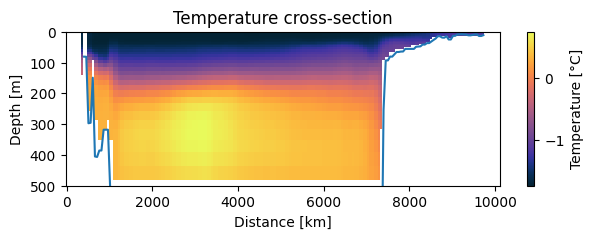

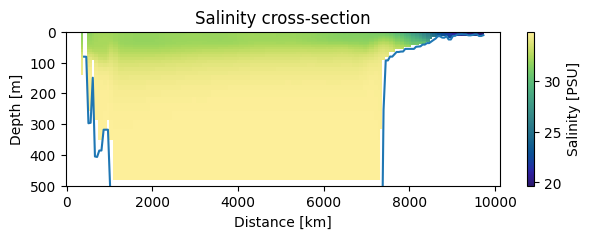

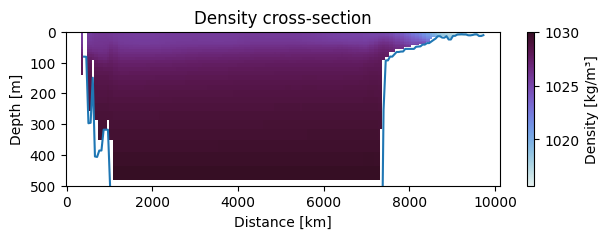

In [12]:
ds_plot = cs_ds.sel(month=4)

fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['T'].values.T, cmap=cmo.thermal)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Temperature [°C]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Temperature cross-section')
plt.show()

# Salinity
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['S'].values.T, cmap=cmo.haline)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Salinity [PSU]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Salinity cross-section')
plt.show()


# Density
ds_plot['rho'] = xr.apply_ufunc(gsw.rho_t_exact, ds_plot['S'], ds_plot['T'], ds_plot.depth, dask='parallelized', output_dtypes=[float])
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['rho'].values.T, cmap=cmo.dense)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Density [kg/m³]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Density cross-section')
plt.show()

In [ ]:
vitesse = vecteurs_coupe(cs_ds)

ds_plot = cs_ds.sel(month=4)

cmap_min = -0.1
cmap_max = +0.1

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['vitesse transversale'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Vitesse transversale')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(ds_plot.dist, ds_plot.depth, ds_plot['V'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(ds_plot.dist, ds_plot['deptho'])
plt.colorbar(pc, ax=ax, label='Vitesse V')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()